In [108]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo

### WALKTHROUGHT

In [109]:
df = pd.read_csv('gdp.csv')

In [110]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [111]:
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [112]:
df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

In [113]:
df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [114]:
df['Country Code'].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

In [115]:
df['Year'].describe()

count    11507.000000
mean      1991.265230
std         15.886648
min       1960.000000
25%       1978.000000
50%       1993.000000
75%       2005.000000
max       2016.000000
Name: Year, dtype: float64

In [116]:
df['Value'].describe()

count    1.150700e+04
mean     1.005972e+12
std      4.533056e+12
min      8.824448e+06
25%      2.056874e+09
50%      1.436880e+10
75%      1.796394e+11
max      7.904923e+13
Name: Value, dtype: float64

In [117]:
df_pr = df[df['Country Name'] == 'Arab World']

<Axes: xlabel='YEARS', ylabel='GDP'>

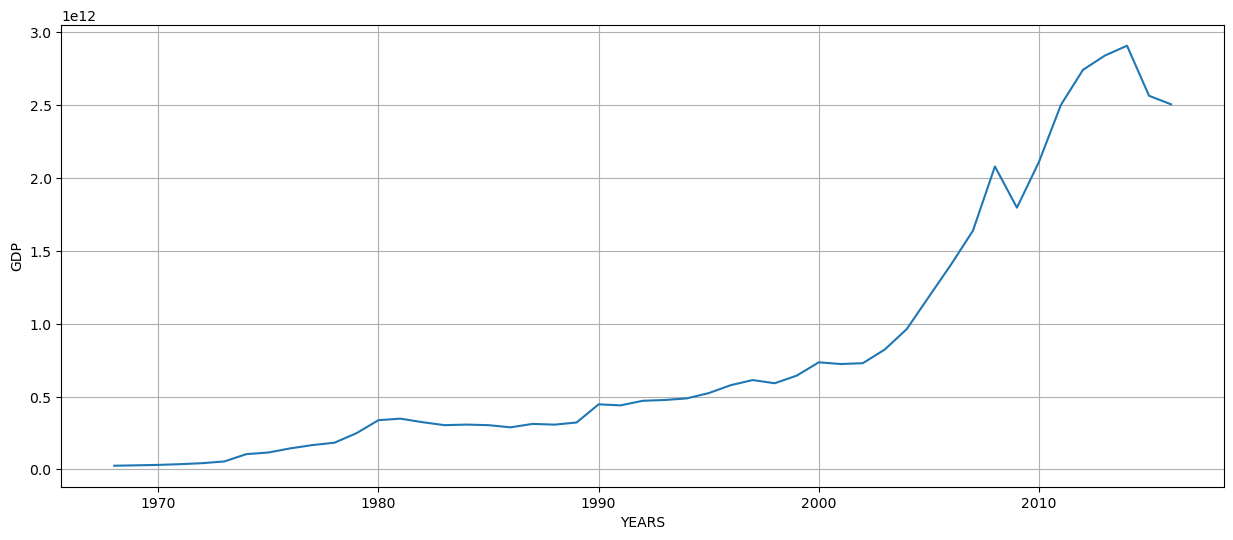

In [118]:
df_pr.plot(kind = 'line', x = 'Year', y = 'Value', figsize = (15,6),
          grid = True,
          legend = False,
          xlabel = 'YEARS',
          ylabel = 'GDP')

In [119]:
df_pr2 = df[df['Country Name'] == 'India']

<Axes: xlabel='YEARS', ylabel='GDP'>

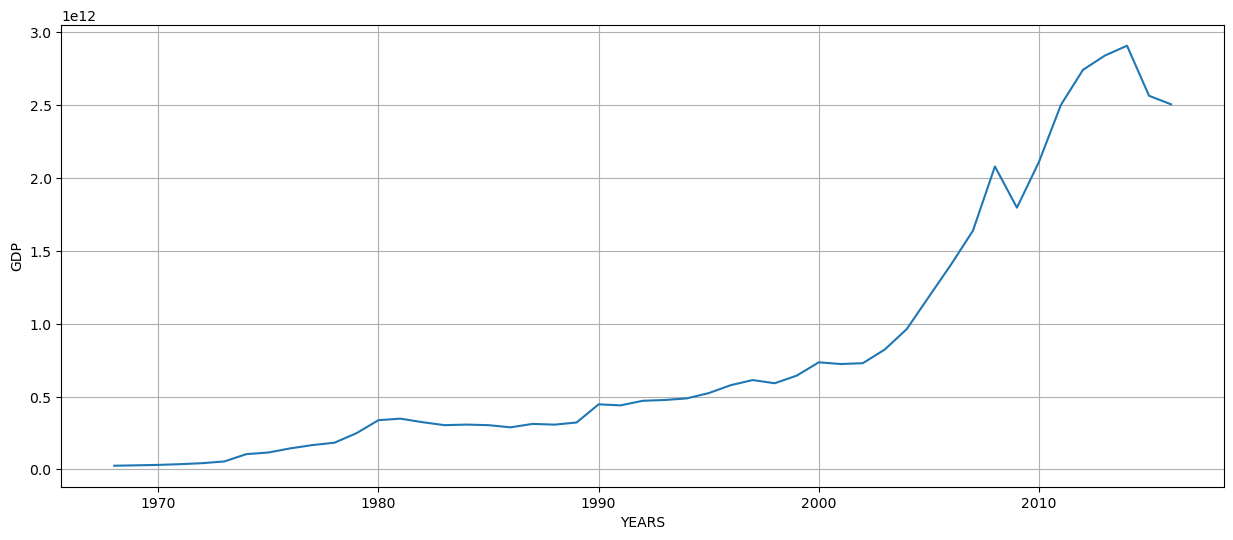

In [120]:
df_pr.plot(kind = 'line', x = 'Year', y = 'Value', figsize = (15,6),
          grid = True,
          legend = False,
          xlabel = 'YEARS',
          ylabel = 'GDP')

In [121]:
df_pr3 = df[df['Country Name'] == 'Pakistan']

<Axes: xlabel='YEARS', ylabel='GDP'>

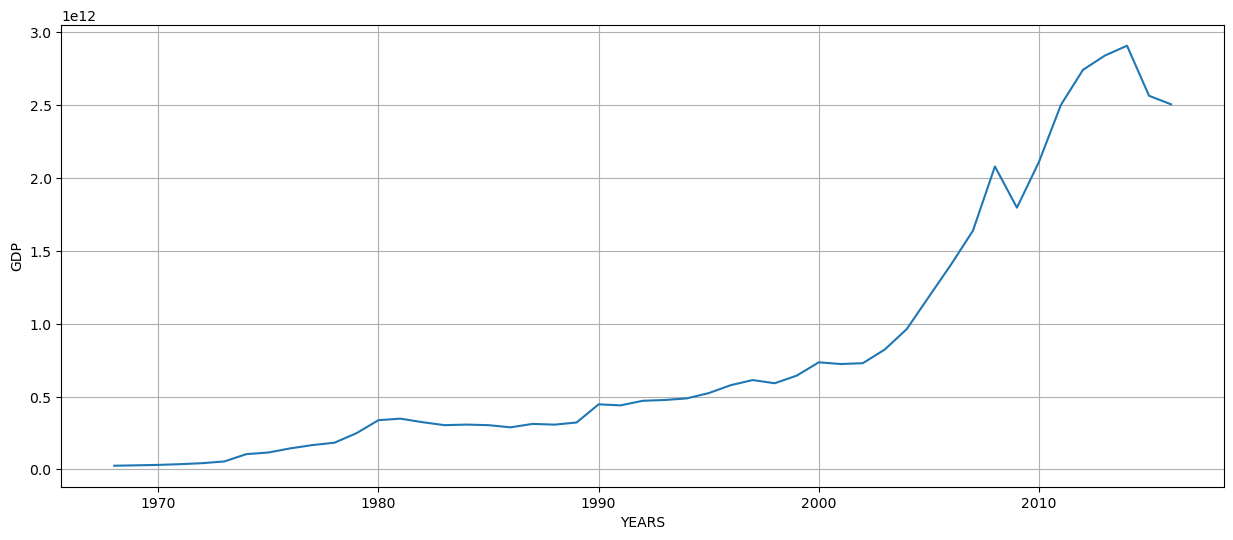

In [122]:
df_pr.plot(kind = 'line', x = 'Year', y = 'Value', figsize = (15,6),
          grid = True,
          legend = False,
          xlabel = 'YEARS',
          ylabel = 'GDP')

### GDP GROWTH OF A COUNTRY

In [123]:
df_pr.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [124]:
# 1968 - 2576
# 1969 - 2843
# 1970 - 3138

In [125]:
round(((2843 - 2576) / 2576)*100,2)
# round(((curr - prev) / prev)*100,2)

10.36

In [126]:
df_pr = df[df['Country Name'] == 'Arab World']
data = df_pr.values

GDP_Change = [0]

for i in range(1,len(data)):
    perv = data[i - 1][3]
    curr = data[i][3]

    GDP_Change.append(round(((curr - perv) / perv)*100,2))
df_pr = df_pr.assign(GDP = GDP_Change)
df_pr.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


### GDP GROWTH ON WHOLE DATASET

In [127]:
Final_Data = []
for Country_Name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == Country_Name]
    data = df_pr.values

    GDP_Change = [0]

    for i in range(1,len(data)):
        perv = data[i - 1][3]
        curr = data[i][3]

        GDP_Change.append(round(((curr - perv) / perv)*100,2))
    df_pr = df_pr.assign(GDP = GDP_Change)
    Final_Data.append(df_pr)

In [128]:
df = pd.concat(Final_Data, axis = 0)

In [129]:
df

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


### PLOTTING GRAPH USING PLOTLY

In [130]:
df_pr4 = df[df['Country Name'] == 'World']
fig = px.line(df_pr4, x = 'Year', y = 'Value', title = 'World GDP Analysis')
fig

In [131]:
pyo.plot(fig, filename = 'World GDP.html')

'World GDP.html'

### PLOTTING GRAPH IN BULK

In [132]:
# os.mkdir('GDP Individual')
# for Country_Name in df['Country Name'].unique():
#     df_pr4 = df[df['Country Name'] == Country_Name]
#     fig = px.line(df_pr4, x = 'Year', y = 'Value', title = Country_Name + 'GDP Analysis')
#     pyo.plot(fig, filename = 'GDP Individual/' + Country_Name + 'GDP.html', auto_open = False)

In [133]:
# os.mkdir('GDP Individual WRT World')
# for Country_Name in df['Country Name'].unique():
#     df_pr4 = df[df['Country Name'] == Country_Name]
#     fig = px.line(df_pr4, x = 'Year', y = 'Value', title = Country_Name + 'GDP Analysis', range_y = [0, 80000000000000])
#     pyo.plot(fig, filename = 'GDP Individual WRT World/' + Country_Name + 'GDP.html', auto_open = False)

### COMPARE GROWTH ACROSS COUNTRY

In [134]:
fig = px.line(df, x = 'Year', y = 'Value', title = 'GDP Analysis all Countries', color = 'Country Name')
pyo.plot(fig, filename = 'Countries GDP.html')

'Countries GDP.html'

In [135]:
c1 = df[df['Country Name'] == 'China']
c2 = df[df['Country Name'] == 'India']

In [136]:
c1.head()

,Country Name,Country Code,Year,Value,GDP
4046,China,CHN,1960,5.971647e+10,0.00
4047,China,CHN,1961,5.005687e+10,-16.18
4048,China,CHN,1962,4.720936e+10,-5.69
4049,China,CHN,1963,5.070680e+10,7.41
4050,China,CHN,1964,5.970834e+10,17.75


In [137]:
c2.head()

,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64


In [138]:
df_pr5 = pd.concat([c1,c2], axis = 0)

In [139]:
df_pr5

,Country Name,Country Code,Year,Value,GDP
4046,China,CHN,1960,5.971647e+10,0.00
4047,China,CHN,1961,5.005687e+10,-16.18
4048,China,CHN,1962,4.720936e+10,-5.69
4049,China,CHN,1963,5.070680e+10,7.41
4050,China,CHN,1964,5.970834e+10,17.75
...,...,...,...,...,...
6126,India,IND,2012,1.827638e+12,0.25
6127,India,IND,2013,1.856722e+12,1.59
6128,India,IND,2014,2.035393e+12,9.62
6129,India,IND,2015,2.089865e+12,2.68


In [149]:
fig = px.line(df_pr5, x = 'Year', y = 'Value', title = 'GDP Comparion | India & China', color = 'Country Name')
pyo.plot(fig, filename = 'IND-CHN.html')

'IND-CHN.html'

In [148]:
c1 = df[df['Country Name'] == 'China']
c2 = df[df['Country Name'] == 'World']

df_pr6 = pd.concat([c1,c2], axis = 0)

fig = px.line(df_pr6, x = 'Year', y = 'Value', title = 'GDP Comparion | China & World', color = 'Country Name')
pyo.plot(fig, filename = 'CHN-WLD.html')

'CHN-WLD.html'

### COMPARE GROWTH ACROSS COUNTRY ADVANCED

In [150]:
lst = ['IND','ITA', 'USA', 'CHN']

dfs = []
for i in lst:
    dfs.append(df[df['Country Code'] == i])
    
    df_pr = pd.concat(dfs, axis = 0)

In [151]:
df_pr

,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64
...,...,...,...,...,...
4098,China,CHN,2012,8.560547e+12,13.05
4099,China,CHN,2013,9.607224e+12,12.23
4100,China,CHN,2014,1.048237e+13,9.11
4101,China,CHN,2015,1.106467e+13,5.55


In [153]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '|'.join(lst), color = 'Country Name')

pyo.plot(fig, filename = '-'.join(lst) + '.html')

'IND-ITA-USA-CHN.html'

In [160]:
def comare_gdp(lst, isOpen):
    
    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)
        
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '|'.join(lst), 
                  color = 'Country Name')
    pyo.plot(fig, filename = '-'.join(lst) + '.html', auto_open = isOpen)

In [161]:
comare_gdp(['IND','USA'], False)

### COMPARE GDP GROWTH COMPARISION

In [164]:
def compare_gdp(lst, isOpen):
    
    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)
        
    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Comparison - ' + '|'.join(lst), 
                  color = 'Country Name')
    pyo.plot(fig, filename = '-'.join(lst) + '.html', auto_open = isOpen)

In [165]:
compare_gdp(['IND','USA','ITA','CHN'], True)

In [166]:
fig = px.line(df, x = 'Year', y = 'GDP', title = 'GDP Comparison', color = 'Country Name')
pyo.plot(fig, filename = 'GDP Growth.html', auto_open = True)

'GDP Growth.html'

### GDP Growth between 1960 - 2016

In [167]:
dfs = []

for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]
    
    if (len(df_pr) == 57):
        dfs.append(df_pr)
        
df_pr = pd.concat(dfs, axis = 0)

In [168]:
df_pr

,Country Name,Country Code,Year,Value,GDP
49,Caribbean small states,CSS,1960,2.004785e+09,0.00
50,Caribbean small states,CSS,1961,2.169733e+09,8.23
51,Caribbean small states,CSS,1962,2.289495e+09,5.52
52,Caribbean small states,CSS,1963,2.431592e+09,6.21
53,Caribbean small states,CSS,1964,2.626896e+09,8.03
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [169]:
fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Growth', color = 'Country Name')

pyo.plot(fig, filename = 'GDP Growth.html', auto_open = True)

'GDP Growth.html'